<a href="https://colab.research.google.com/github/yongyonggi/yongyong/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.


In [ ]:
import pandas as pd 

In [ ]:
import missingno as msno

In [ ]:
df = pd.read_csv('autos.csv')

In [ ]:
df=df.drop('index',axis=1)

In [ ]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['Days'] = df['lastSeen']- df['dateCrawled']
df['Days'] = df['Days'].dt.days

<Axes: >

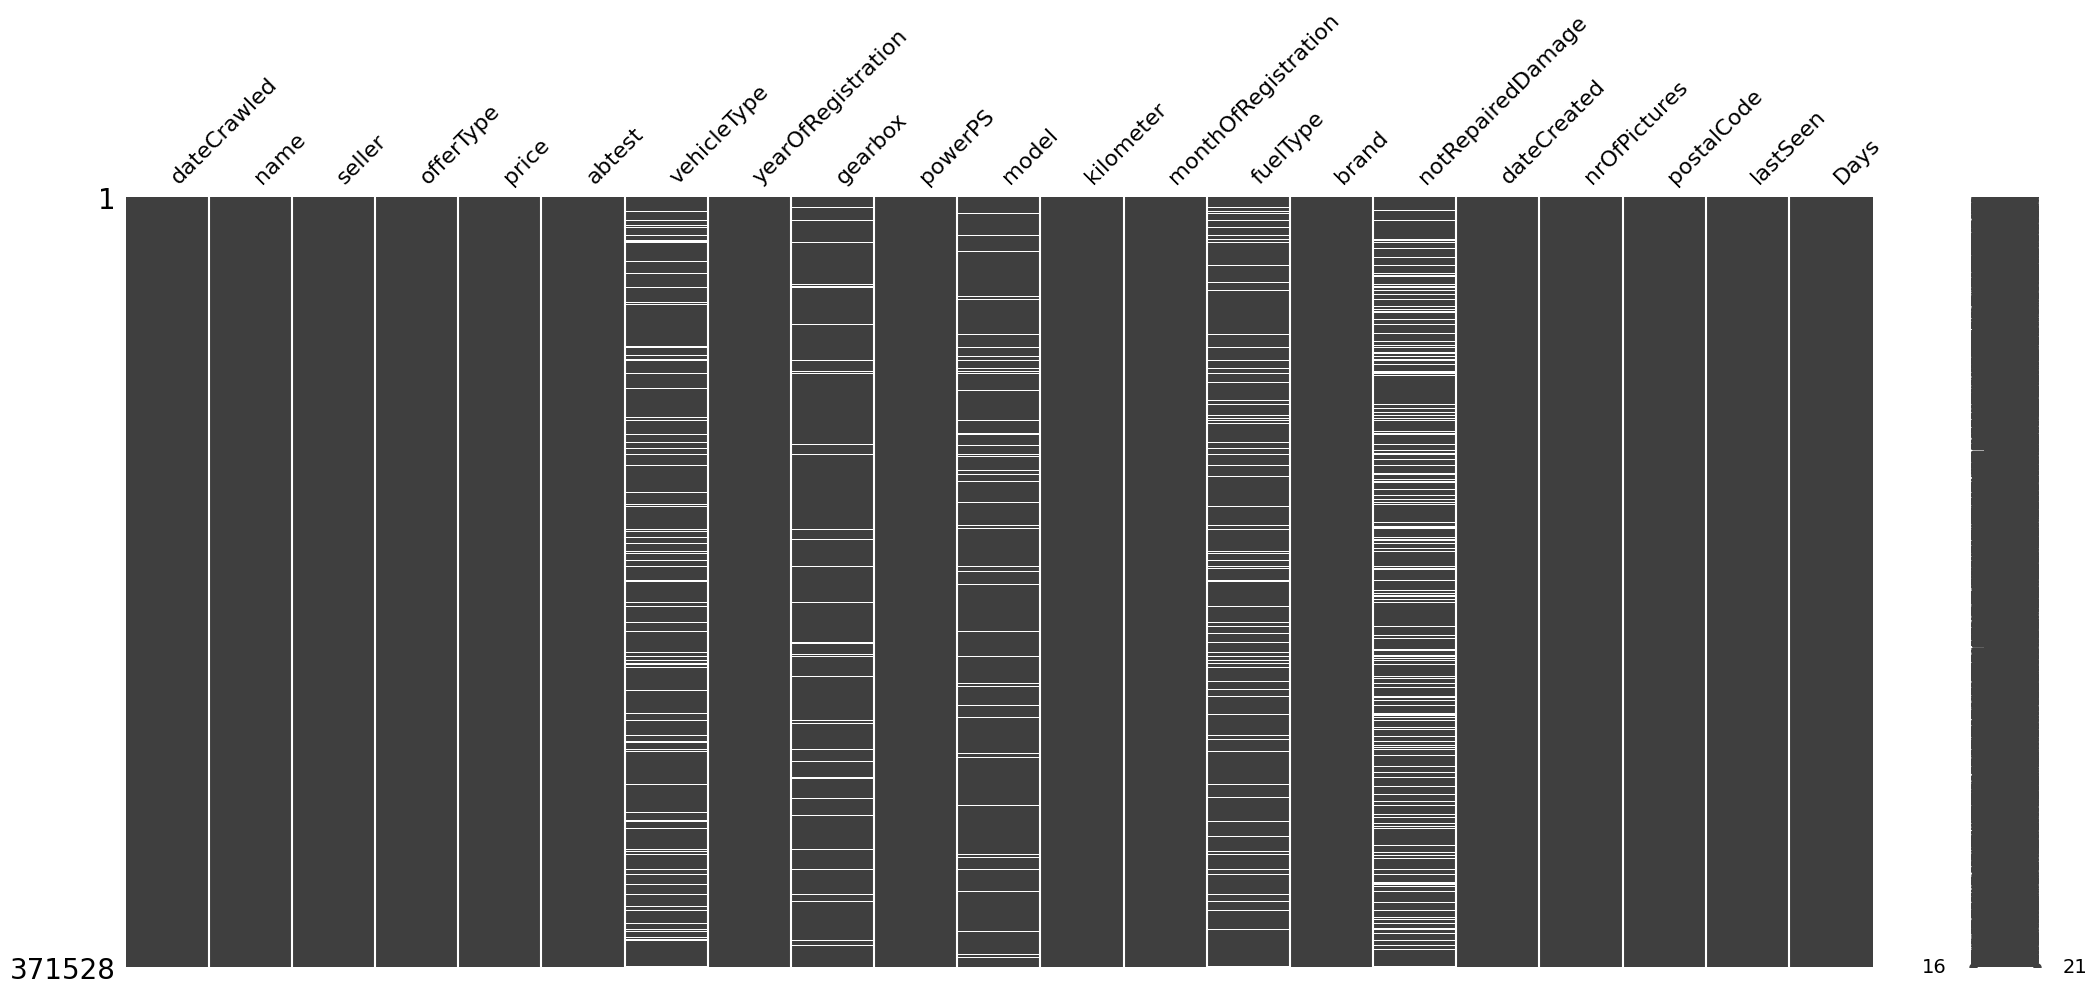

In [ ]:
msno.matrix(df) 

In [ ]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
Days                       0
dtype: int64

<Axes: xlabel='brand'>

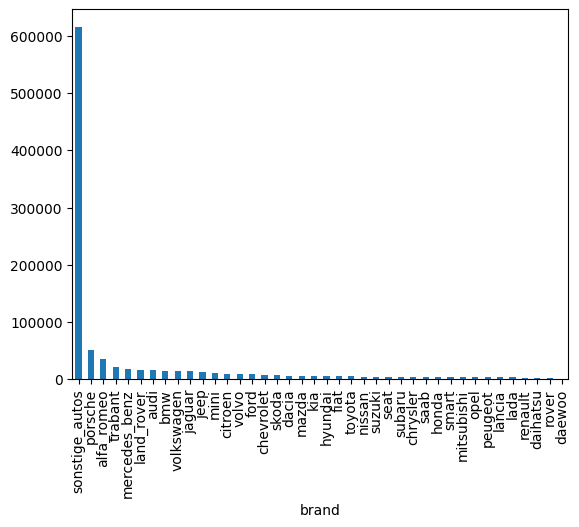

In [ ]:
br_p1 = df.groupby('brand')['price'].mean()
br_p1.sort_values(ascending=False).plot(kind='bar')

In [ ]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Days
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,13
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,13
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,21
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,22
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,5
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,18
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21,3


In [ ]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [ ]:
# 필요없는 요소 제거 

In [ ]:
df=df.drop('dateCrawled',axis=1)

In [ ]:
df=df.drop('postalCode',axis=1)

In [ ]:
df=df.drop('nrOfPictures',axis=1)

In [ ]:
df=df.drop('abtest',axis=1)

In [ ]:
df=df.drop('seller',axis=1) # 판매자 의미 없다고 판단

In [ ]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [ ]:
df=df.drop('offerType',axis=1) # 의미 없다고 판단

In [ ]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [ ]:
df['notRepairedDamage']=df['notRepairedDamage'].fillna('Unknown') # 결측치 unknown 처리 

In [ ]:
df.isnull().sum()

name                       0
price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage          0
dateCreated                0
lastSeen                   0
Days                       0
dtype: int64

In [ ]:
df[df['name'].duplicated()]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
227,BMW_325i_Aut.,11800,limousine,2005,automatik,218,3er,150000,11,benzin,bmw,nein,2016-04-05 00:00:00,2016-04-07 12:17:52,2
298,BMW_316i,2400,limousine,1989,manuell,102,3er,150000,10,benzin,bmw,nein,2016-03-30 00:00:00,2016-04-03 06:53:38,3
337,Mercedes_Benz_C_220_T_CDI_Avantgarde,11700,kombi,2008,manuell,170,andere,150000,7,diesel,mercedes_benz,nein,2016-03-16 00:00:00,2016-04-06 23:16:34,21
394,Fiat_Punto_1.2,1100,kleinwagen,2000,manuell,60,punto,60000,6,benzin,fiat,nein,2016-03-10 00:00:00,2016-03-11 02:16:04,0
396,Volkswagen_Golf_1.4_Comfortline,7750,limousine,2009,manuell,80,golf,125000,9,benzin,volkswagen,nein,2016-04-02 00:00:00,2016-04-06 18:16:04,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371516,Volkswagen_Lupo_1.0,1490,kleinwagen,1998,manuell,50,lupo,150000,9,benzin,volkswagen,nein,2016-04-04 00:00:00,2016-04-06 11:17:13,2
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-28 00:00:00,2016-04-02 18:16:20,5
371521,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,2016-03-29 10:17:23,1
371522,Mitsubishi_Cold,0,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,2016-03-21 10:42:49,0


In [ ]:
df1 = df.query('name == "BMW_316i"')

In [ ]:
df1

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
244,BMW_316i,899,coupe,1995,manuell,102,3er,150000,8,benzin,bmw,nein,2016-03-17 00:00:00,2016-03-20 07:17:29,3
298,BMW_316i,2400,limousine,1989,manuell,102,3er,150000,10,benzin,bmw,nein,2016-03-30 00:00:00,2016-04-03 06:53:38,3
734,BMW_316i,550,coupe,1995,manuell,105,3er,150000,11,benzin,bmw,nein,2016-03-18 00:00:00,2016-04-05 22:47:01,18
779,BMW_316i,2850,limousine,2000,manuell,105,3er,150000,7,benzin,bmw,nein,2016-03-22 00:00:00,2016-04-06 05:45:42,14
971,BMW_316i,1400,limousine,2000,manuell,105,3er,150000,3,benzin,bmw,nein,2016-04-05 00:00:00,2016-04-05 13:25:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367870,BMW_316i,2000,limousine,1999,manuell,105,3er,150000,3,benzin,bmw,nein,2016-03-24 00:00:00,2016-03-25 18:16:47,1
368154,BMW_316i,900,limousine,1994,manuell,102,3er,150000,6,benzin,bmw,nein,2016-04-01 00:00:00,2016-04-06 19:18:20,5
368792,BMW_316i,800,coupe,1995,manuell,102,3er,150000,3,benzin,bmw,nein,2016-03-30 00:00:00,2016-04-06 00:17:20,5
368842,BMW_316i,3300,limousine,2000,manuell,105,3er,150000,5,benzin,bmw,ja,2016-04-03 00:00:00,2016-04-05 12:20:00,1


In [ ]:
df1[df1['fuelType'].isnull()]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
303709,BMW_316i,400,NaN,2016,manuell,102,3er,150000,12,NaN,bmw,ja,2016-03-31 00:00:00,2016-04-06 16:45:28,5
340594,BMW_316i,550,limousine,1997,manuell,104,3er,150000,0,NaN,bmw,ja,2016-03-22 00:00:00,2016-03-27 23:47:05,5


In [ ]:
df.iloc[303709,3] = 'coupe'

In [ ]:
df.iloc[303709,10] = 'benzin'

In [ ]:
df[df['fuelType'].isnull()]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,Unknown,2016-03-17 00:00:00,2016-03-31 17:17:06,14
13,VW_PASSAT_1.9_TDI_131_PS_LEDER,2500,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein,2016-03-21 00:00:00,2016-03-23 02:50:54,1
26,Citroen_C4_Grand_Picasso.,5555,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein,2016-03-10 00:00:00,2016-03-16 09:16:46,5
36,Opel_Kadett_E_CC,1600,andere,1991,manuell,75,kadett,70000,0,NaN,opel,Unknown,2016-03-11 00:00:00,2016-04-07 03:46:09,26
41,E_500_Avantgarde_AMG_Ausstattung,7500,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,Unknown,2016-03-30 00:00:00,2016-04-03 11:44:49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371496,"Peugeot_206_CC_""Filou""",3850,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein,2016-03-20 00:00:00,2016-03-26 21:18:23,6
371504,220_cdi_Benz,2600,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,Unknown,2016-03-07 00:00:00,2016-03-08 21:28:38,1
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,1900,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein,2016-03-11 00:00:00,2016-03-12 14:16:51,0
371519,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,5250,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein,2016-03-09 00:00:00,2016-03-13 01:44:13,3


In [ ]:
df.query('name== "Opel_Tigra"')

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
3415,Opel_Tigra,550,NaN,2016,manuell,90,tigra,150000,5,NaN,opel,Unknown,2016-03-20 00:00:00,2016-03-24 12:15:18,3
17894,Opel_Tigra,250,NaN,1995,manuell,90,tigra,150000,0,NaN,opel,Unknown,2016-03-06 00:00:00,2016-04-01 00:45:34,25
18620,Opel_Tigra,0,kleinwagen,1995,manuell,106,tigra,150000,8,benzin,opel,ja,2016-04-02 00:00:00,2016-04-06 17:17:50,3
21906,Opel_Tigra,800,coupe,1998,manuell,125,tigra,150000,1,benzin,opel,nein,2016-03-20 00:00:00,2016-04-07 08:44:31,17
29659,Opel_Tigra,200,limousine,1995,manuell,90,tigra,150000,10,benzin,opel,ja,2016-03-23 00:00:00,2016-04-03 13:56:42,10
32520,Opel_Tigra,190,NaN,1995,NaN,0,tigra,150000,4,benzin,opel,Unknown,2016-03-09 00:00:00,2016-04-06 19:18:03,28
40107,Opel_Tigra,700,kleinwagen,1997,manuell,90,tigra,150000,3,benzin,opel,nein,2016-03-13 00:00:00,2016-04-06 17:16:49,24
40589,Opel_Tigra,1400,NaN,2017,NaN,0,tigra,150000,2,NaN,opel,Unknown,2016-03-21 00:00:00,2016-03-28 03:16:05,6
60088,Opel_Tigra,850,kleinwagen,1997,manuell,106,tigra,150000,2,benzin,opel,nein,2016-04-03 00:00:00,2016-04-03 18:53:10,0
60963,Opel_Tigra,5000,kleinwagen,1997,manuell,150,tigra,100000,9,benzin,opel,nein,2016-03-06 00:00:00,2016-04-04 02:44:49,28


In [ ]:
df.iloc[36,10] = 'benzin'

In [ ]:
df[df['model'].isnull()]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,2016-04-07 01:46:50,13
60,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,1,suv,1994,manuell,286,NaN,150000,11,NaN,sonstige_autos,Unknown,2016-03-29 00:00:00,2016-04-06 01:44:38,7
83,Bastler_Fahrzeug_mit_Rest_Tuev,350,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja,2016-04-03 00:00:00,2016-04-05 11:47:13,1
119,Polo_6n_Karosse_zu_verschenken,0,kleinwagen,1999,NaN,0,NaN,5000,0,benzin,volkswagen,Unknown,2016-03-20 00:00:00,2016-04-07 02:45:22,17
139,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,1450,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein,2016-03-27 00:00:00,2016-04-05 20:17:31,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371399,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,560,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja,2016-03-07 00:00:00,2016-03-12 21:45:25,5
371476,ALPINA_D3_Touring,9400,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja,2016-03-15 00:00:00,2016-03-17 08:16:25,1
371495,Opel_Tigra,180,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,Unknown,2016-03-31 00:00:00,2016-04-06 14:18:04,5
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,1900,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein,2016-03-11 00:00:00,2016-03-12 14:16:51,0


In [ ]:
df.query('name== "Opel_Tigra"')

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
3415,Opel_Tigra,550,NaN,2016,manuell,90,tigra,150000,5,NaN,opel,Unknown,2016-03-20 00:00:00,2016-03-24 12:15:18,3
17894,Opel_Tigra,250,NaN,1995,manuell,90,tigra,150000,0,NaN,opel,Unknown,2016-03-06 00:00:00,2016-04-01 00:45:34,25
18620,Opel_Tigra,0,kleinwagen,1995,manuell,106,tigra,150000,8,benzin,opel,ja,2016-04-02 00:00:00,2016-04-06 17:17:50,3
21906,Opel_Tigra,800,coupe,1998,manuell,125,tigra,150000,1,benzin,opel,nein,2016-03-20 00:00:00,2016-04-07 08:44:31,17
29659,Opel_Tigra,200,limousine,1995,manuell,90,tigra,150000,10,benzin,opel,ja,2016-03-23 00:00:00,2016-04-03 13:56:42,10
32520,Opel_Tigra,190,NaN,1995,NaN,0,tigra,150000,4,benzin,opel,Unknown,2016-03-09 00:00:00,2016-04-06 19:18:03,28
40107,Opel_Tigra,700,kleinwagen,1997,manuell,90,tigra,150000,3,benzin,opel,nein,2016-03-13 00:00:00,2016-04-06 17:16:49,24
40589,Opel_Tigra,1400,NaN,2017,NaN,0,tigra,150000,2,NaN,opel,Unknown,2016-03-21 00:00:00,2016-03-28 03:16:05,6
60088,Opel_Tigra,850,kleinwagen,1997,manuell,106,tigra,150000,2,benzin,opel,nein,2016-04-03 00:00:00,2016-04-03 18:53:10,0
60963,Opel_Tigra,5000,kleinwagen,1997,manuell,150,tigra,100000,9,benzin,opel,nein,2016-03-06 00:00:00,2016-04-04 02:44:49,28


In [ ]:
df.iloc[3415,10] = 'benzin'

In [ ]:
df.iloc[17894,10] = 'benzin'

In [ ]:
df.iloc[40589,10] = 'benzin'

In [ ]:
df.iloc[75392,10] = 'benzin'

In [ ]:
df.iloc[92204,10] = 'benzin'

In [ ]:
df.iloc[173843,10] = 'benzin'

In [ ]:
df.iloc[236544,10] = 'benzin'

In [ ]:
df.iloc[275218,10] = 'benzin'

In [ ]:
df.iloc[301036,10] = 'benzin'

In [ ]:
df=df.query('price>0')

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

name                       0
price                      0
vehicleType            34127
yearOfRegistration         0
gearbox                17729
powerPS                    0
model                  18300
kilometer                  0
monthOfRegistration        0
fuelType               29948
brand                      0
notRepairedDamage          0
dateCreated                0
lastSeen                   0
Days                       0
dtype: int64

In [ ]:
df ['vehicleType']

0                NaN
1              coupe
2                suv
3         kleinwagen
4         kleinwagen
             ...    
360745           NaN
360746        cabrio
360747           bus
360748         kombi
360749     limousine
Name: vehicleType, Length: 360750, dtype: object

In [ ]:
df_c =df.copy()

In [ ]:
df_c = df_c.dropna()

In [ ]:
df_c.reset_index(drop=True,inplace=True)

In [ ]:
df_c.query('price >500000')

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
1452,BMW_M1_Museumsfahrzeug_Neuwagenzustand_Glossy_...,579000,coupe,1980,manuell,277,andere,20000,12,benzin,bmw,nein,2016-03-10 00:00:00,2016-03-23 10:45:27,12
11591,Tausch_moeglich_Polo_vw_n9,11111111,coupe,2003,manuell,64,polo,150000,2,benzin,volkswagen,Unknown,2016-04-03 00:00:00,2016-04-07 10:16:51,4
15930,Porsche_911R_Einer_von_911,1250000,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-17 00:00:00,2016-03-20 04:48:27,2
17004,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,9999999,coupe,1967,manuell,215,911,50000,10,benzin,porsche,nein,2016-03-19 00:00:00,2016-04-01 10:45:30,12
20830,Porsche_911_R,600000,coupe,2016,manuell,500,911,5000,3,benzin,porsche,nein,2016-03-21 00:00:00,2016-03-21 19:43:54,0
30377,2_VW_Busse_T3,999999,bus,1981,manuell,70,transporter,150000,1,benzin,volkswagen,Unknown,2016-03-21 00:00:00,2016-03-28 17:18:28,6
36286,Porsche_911_Turbo__930_,1000000,coupe,1981,manuell,300,911,150000,1,benzin,porsche,nein,2016-03-15 00:00:00,2016-03-22 09:18:05,6
42388,Suzuki_SJ_Samurai_413_Van__Kein_Lada_Niva_,1000000,suv,1992,manuell,69,andere,100000,0,benzin,suzuki,nein,2016-03-11 00:00:00,2016-04-05 21:17:47,25
43028,Mazda_5_2.0_CD_DPF_Exclusive,10000000,bus,2007,manuell,143,5_reihe,150000,2,diesel,mazda,nein,2016-03-08 00:00:00,2016-03-10 14:17:16,2
61498,Tausch_gegen_gleichwertiges,99999999,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,Unknown,2016-03-22 00:00:00,2016-04-06 05:15:30,14


In [ ]:
df_c=df_c[df_c['price']<90000]

In [ ]:
df_c.reset_index(drop=True,inplace=True)

In [ ]:
df_c

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,Days
0,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,Unknown,2016-03-14 00:00:00,2016-04-05 12:47:46,21
1,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17,0
2,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21,5
3,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,2016-04-06 19:17:07,2
4,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,2016-04-05 18:18:39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294525,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,2016-03-29 10:17:23,1
294526,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12,5
294527,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,2016-04-07 07:15:26,18
294528,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,Unknown,2016-03-20 00:00:00,2016-03-24 12:45:21,3


In [ ]:
df_c[df_c["powerPS"]<10]["powerPS"].count()

15517

In [ ]:
df_c[df_c["powerPS"]>10**3]["powerPS"].count()

185

In [ ]:
df_c=df_c.query('10<powerPS<1000')

In [ ]:
veh_co=df_c['vehicleType'].value_counts()

In [ ]:
veh_co

limousine     81702
kleinwagen    63789
kombi         57415
bus           26032
cabrio        19586
coupe         15650
suv           12575
andere         2070
Name: vehicleType, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

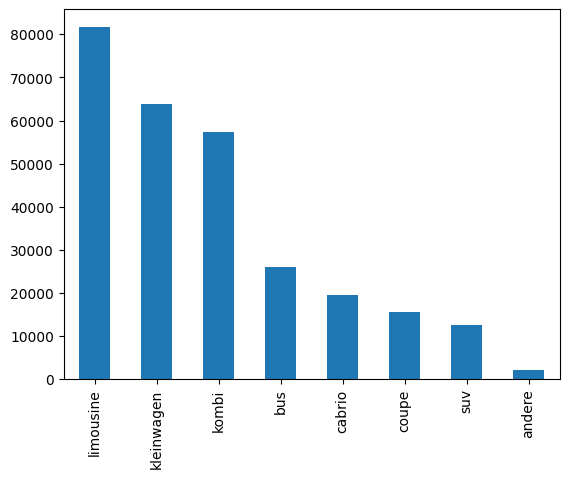

In [ ]:
veh_co.plot(kind='bar')

In [ ]:
veh_co1=df_c['fuelType'].value_counts()

<Axes: >

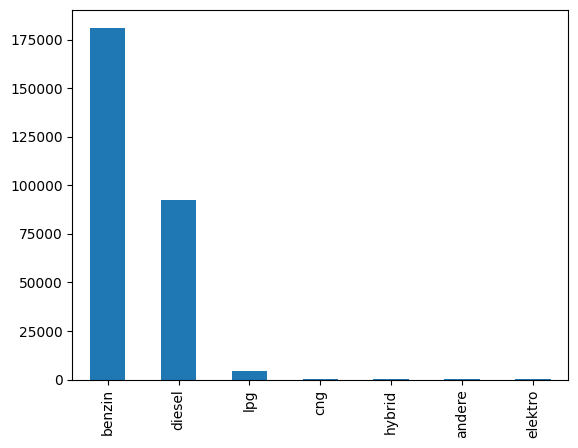

In [ ]:
veh_co1.plot(kind='bar')

In [ ]:
veh_co2=df_c['brand'].value_counts()

<Axes: >

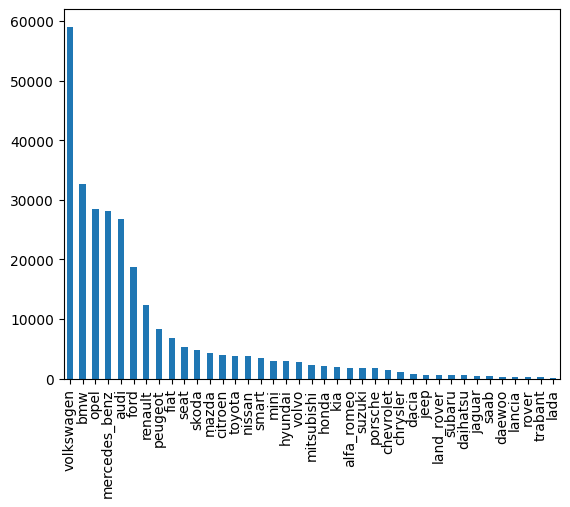

In [ ]:
veh_co2.plot(kind='bar')

In [ ]:
br_pr = df_c.groupby('brand')['price'].mean()

<Axes: xlabel='brand'>

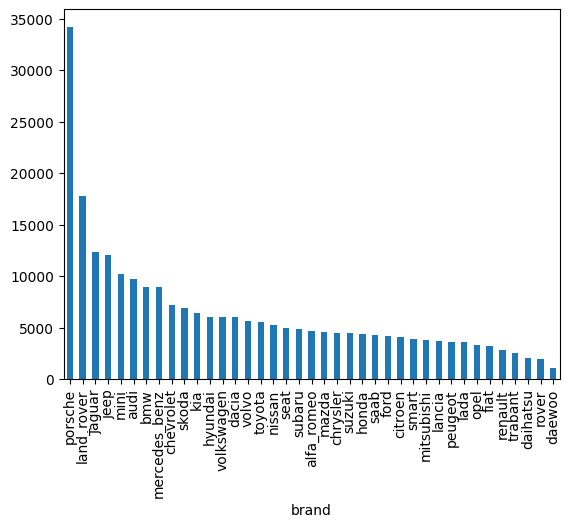

In [ ]:
br_pr.sort_values(ascending=False).plot(kind='bar')

In [ ]:
kr_pr = df_c.groupby('kilometer')['price'].mean()

<Axes: xlabel='kilometer'>

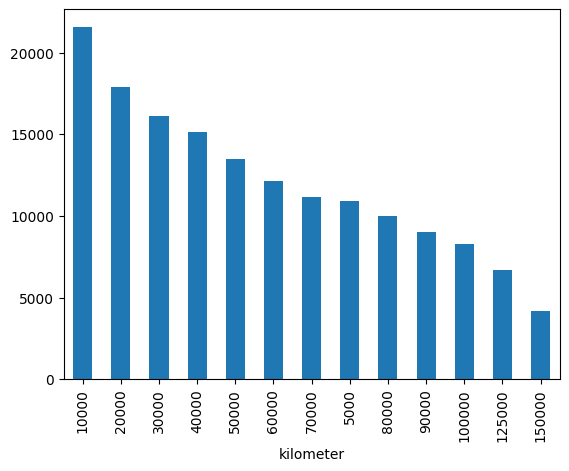

In [ ]:
kr_pr.sort_values(ascending=False).plot(kind='bar')

In [ ]:
yr_pr = df_c.groupby('yearOfRegistration')['price'].count()

<Axes: xlabel='yearOfRegistration'>

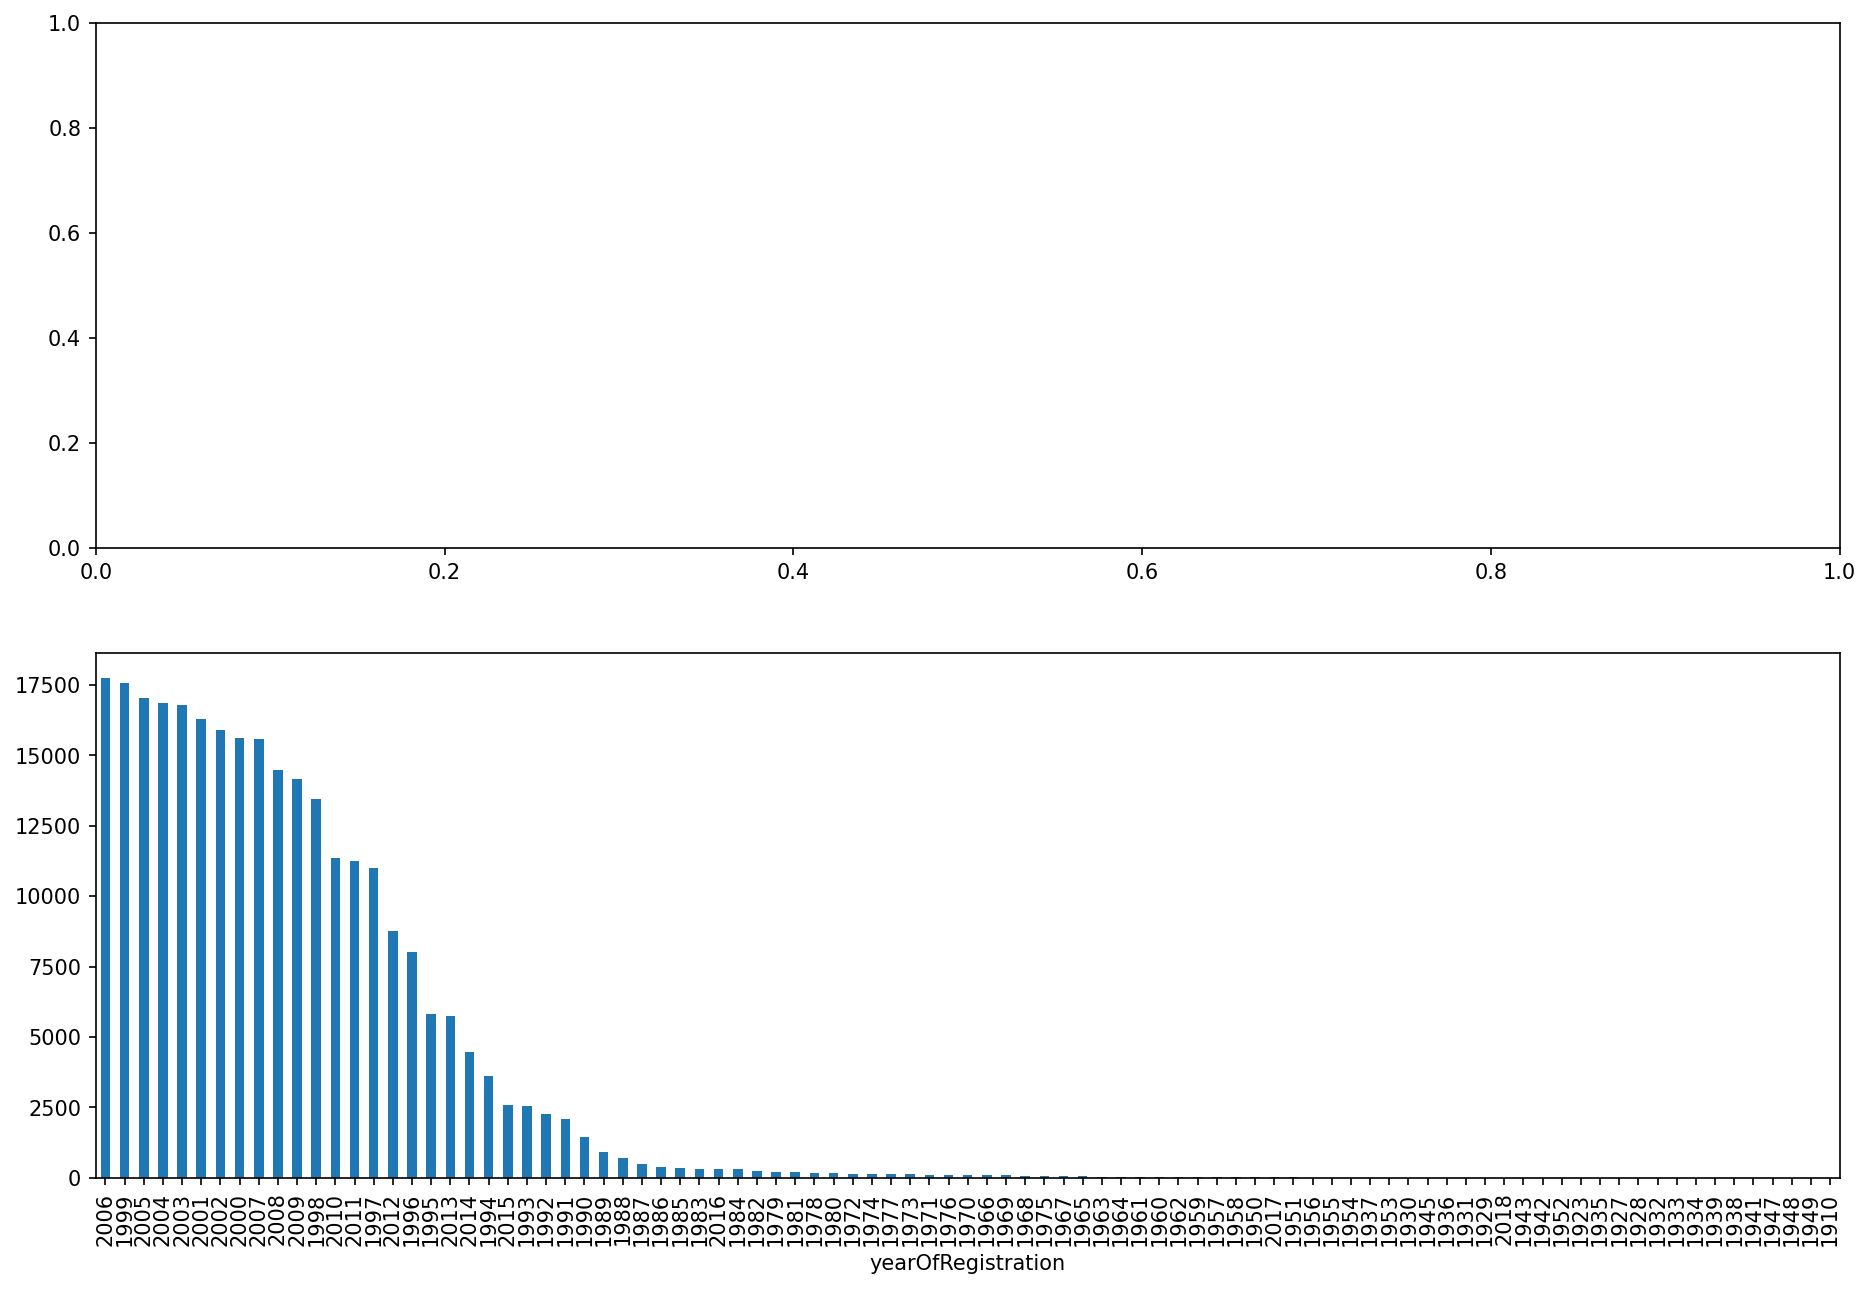

In [ ]:
fig, axes = plt.subplots( 2, figsize=(15,10), dpi= 150)
yr_pr.sort_values(ascending=False).plot(kind='bar')

In [ ]:
import seaborn as sns 

<Axes: xlabel='yearOfRegistration'>

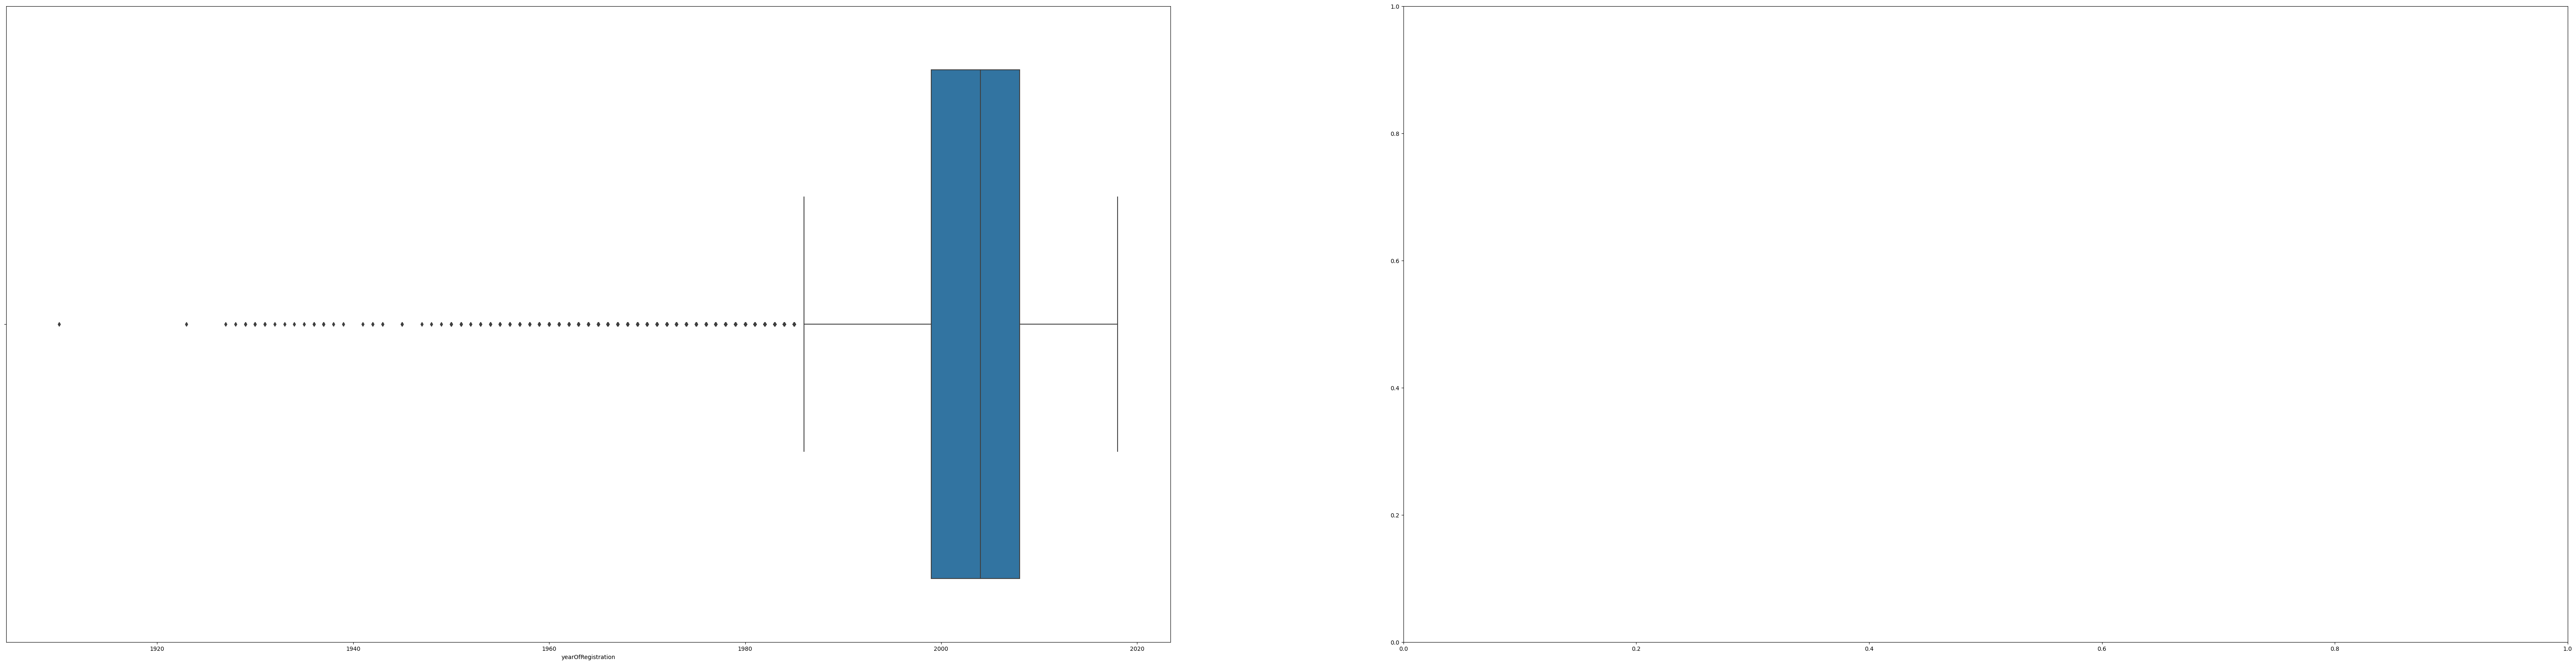

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(80,20), dpi= 100)
sns.boxplot(x='yearOfRegistration', data=df_c, ax=axes[0])

<Axes: xlabel='brand', ylabel='yearOfRegistration'>

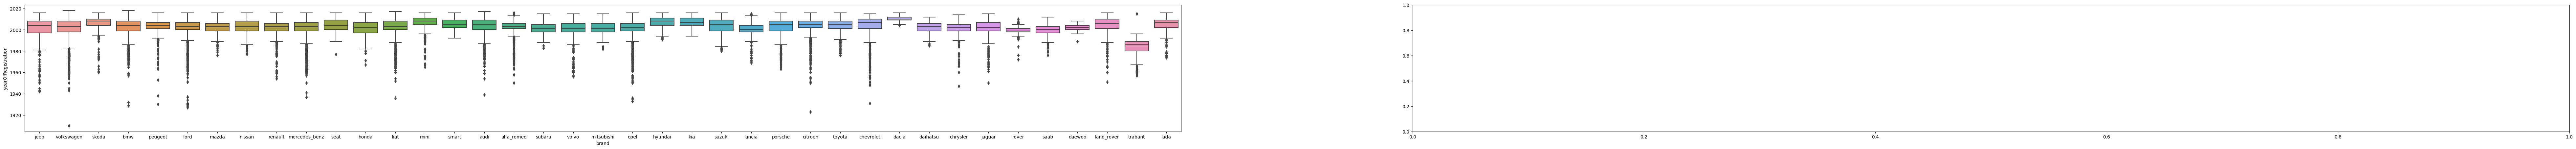

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(100,5), dpi= 100)
sns.boxplot(x='brand', y='yearOfRegistration', data=df_c, ax=axes[0])

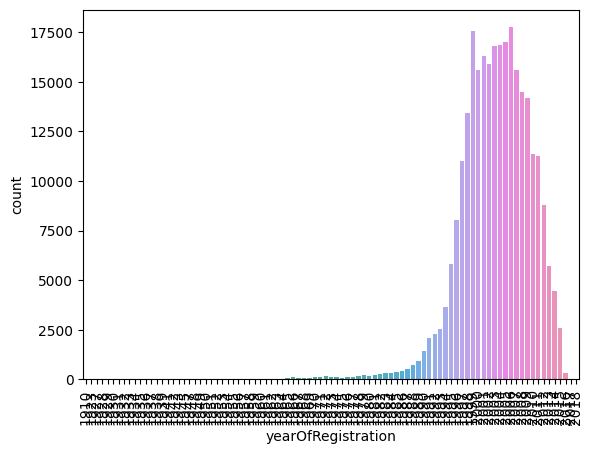

In [ ]:
sns.countplot(x='yearOfRegistration',data=df_c)
plt.xticks(rotation=90);

<Axes: xlabel='notRepairedDamage', ylabel='price'>

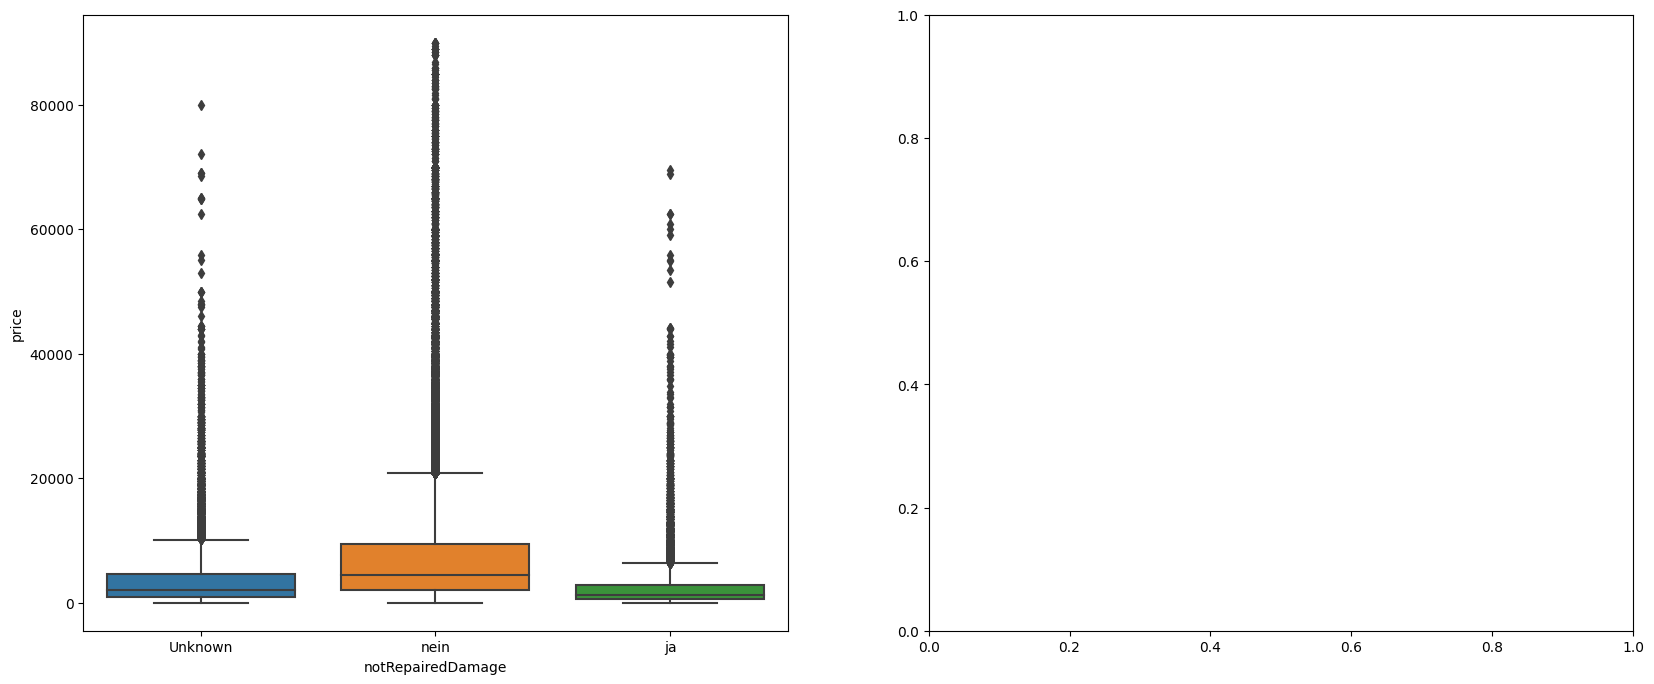

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,8), dpi= 100)
sns.boxplot(x='notRepairedDamage', y='price', data=df_c, ax=axes[0])

In [ ]:
str_exp = "brand  == ['volkswagen','mercedes_benz' ,'audi','ford','opel','bmw']"
df_c1 = df_c.query(str_exp)

In [ ]:
df_c1['brand'].unique()

array(['volkswagen', 'bmw', 'ford', 'mercedes_benz', 'audi', 'opel'],
      dtype=object)

<Axes: xlabel='brand', ylabel='price'>

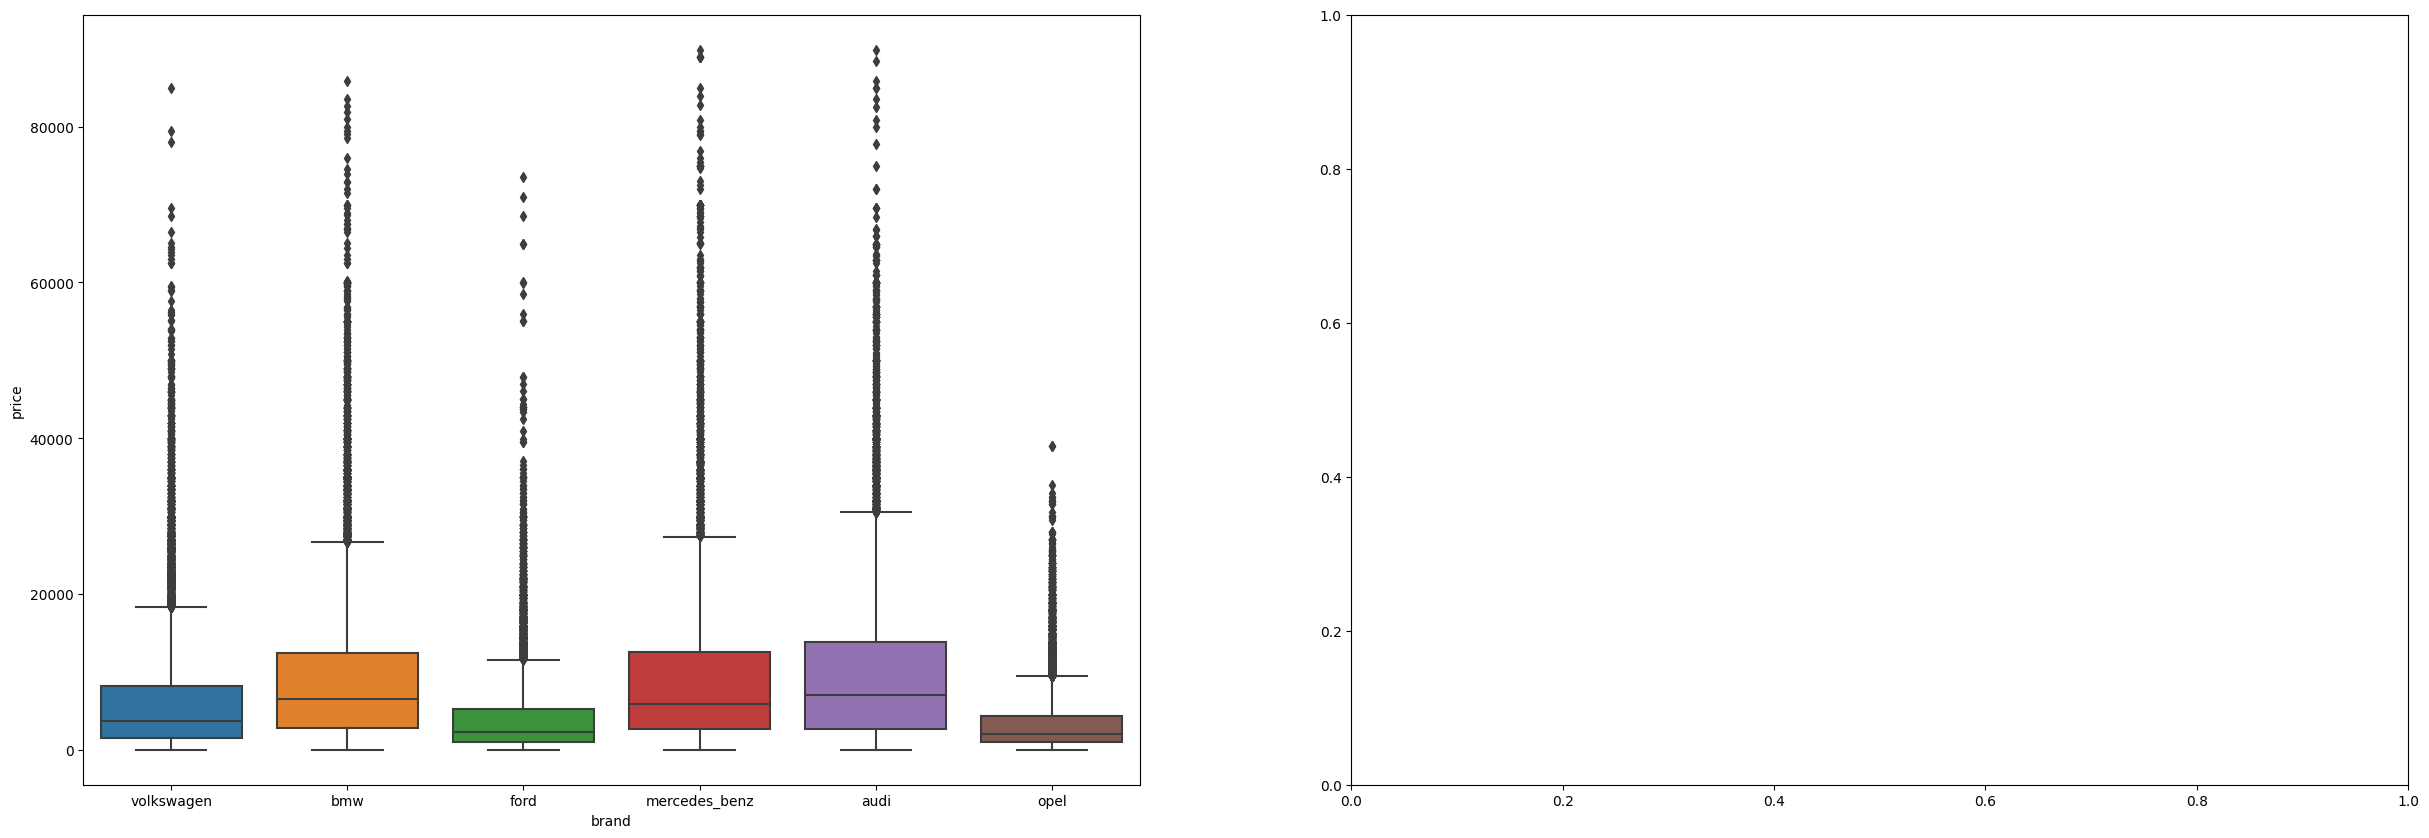

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(30,10), dpi= 100)
sns.boxplot(x='brand', y='price', data=df_c1, ax=axes[0])

<Axes: xlabel='price'>

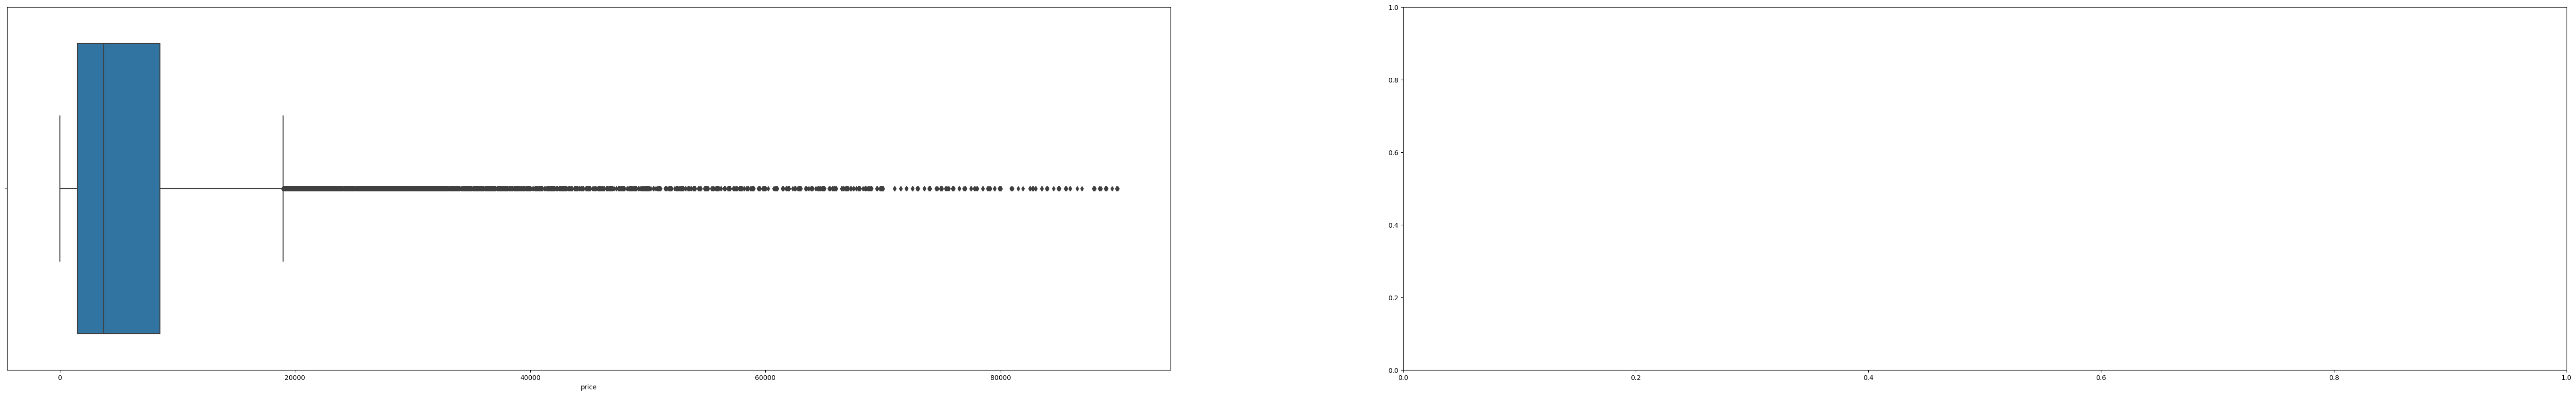

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(70,10), dpi= 100)
sns.boxplot(x='price', data=df_c, ax=axes[0])

In [ ]:
br_ve = df_c1.groupby('brand')['vehicleType'].describe()

In [ ]:
br_ve['top'].sort_values(ascending=False)

brand
bmw               limousine
mercedes_benz     limousine
volkswagen        limousine
audi                  kombi
ford             kleinwagen
opel             kleinwagen
Name: top, dtype: object

In [ ]:
vol = df_c.query('brand == "volkswagen"')

In [ ]:
vol['vehicleType'].value_counts()

limousine     17782
kleinwagen    14827
kombi         10865
bus            9200
cabrio         2637
suv            1615
coupe          1588
andere          546
Name: vehicleType, dtype: int64

In [ ]:
bmw = df_c.query('brand == "bmw"')

In [ ]:
bmw['vehicleType'].value_counts()

limousine     16719
kombi          7349
coupe          3668
cabrio         3400
suv             937
kleinwagen      348
andere          182
bus              47
Name: vehicleType, dtype: int64

In [ ]:
opel = df_c.query('brand == "opel"')

In [ ]:
opel['vehicleType'].value_counts()

kleinwagen    9641
limousine     6485
kombi         5780
bus           3410
cabrio        1395
coupe         1213
suv            379
andere         171
Name: vehicleType, dtype: int64

In [ ]:
me = df_c.query('brand == "mercedes_benz"')

In [ ]:
me['vehicleType'].value_counts()

limousine     11905
kombi          5780
coupe          3145
cabrio         2517
bus            2495
suv            1502
kleinwagen      676
andere          187
Name: vehicleType, dtype: int64

In [ ]:
br_mon = df_c.groupby('brand')['monthOfRegistration'].mean()

In [ ]:
br_mon.sort_values(ascending=False)

brand
daewoo           7.036932
daihatsu         6.706865
rover            6.679310
jaguar           6.564453
dacia            6.524194
smart            6.412397
lada             6.387324
jeep             6.343939
chrysler         6.298677
mercedes_benz    6.294927
hyundai          6.290434
audi             6.288350
mini             6.271328
toyota           6.247108
skoda            6.237558
seat             6.216125
bmw              6.210781
kia              6.208040
land_rover       6.180556
volkswagen       6.141839
nissan           6.121171
citroen          6.113561
saab             6.043379
volvo            6.043015
opel             6.031538
suzuki           6.029960
peugeot          6.028041
subaru           6.005093
ford             5.998451
chevrolet        5.988571
renault          5.986110
porsche          5.946644
mazda            5.917112
mitsubishi       5.902921
fiat             5.893846
honda            5.872474
alfa_romeo       5.850613
lancia           5.788856
traban

In [ ]:
pr_mon = df_c.groupby('price')['monthOfRegistration'].mean()

In [ ]:
pr_mon

price
1         5.153846
2         6.166667
3         2.666667
5         3.000000
9         7.250000
           ...    
88997     9.000000
89000     8.166667
89500    10.000000
89900     6.500000
89950     5.000000
Name: monthOfRegistration, Length: 5062, dtype: float64

In [ ]:
df_c['price'].sort_values()

125679        1
236523        1
258136        1
181166        1
235452        1
          ...  
268379    89900
202177    89900
202795    89900
41092     89900
172791    89950
Name: price, Length: 278819, dtype: int64

In [ ]:
df_c.reset_index(drop=True,inplace=True)

In [ ]:
df_c['price'].sort_values()

118900        1
223876        1
244388        1
171412        1
222864        1
          ...  
254078    89900
191320    89900
191912    89900
38858     89900
163490    89950
Name: price, Length: 278819, dtype: int64

In [ ]:
df_c.iloc[254081]

name                   240D_W123_Diesel_Automatikgetriebe_H_Zulassung...
price                                                               2500
vehicleType                                                    limousine
yearOfRegistration                                                  1980
gearbox                                                        automatik
powerPS                                                               72
model                                                           e_klasse
kilometer                                                         150000
monthOfRegistration                                                    6
fuelType                                                          diesel
brand                                                      mercedes_benz
notRepairedDamage                                                Unknown
dateCreated                                          2016-04-02 00:00:00
lastSeen                                           

<Axes: >

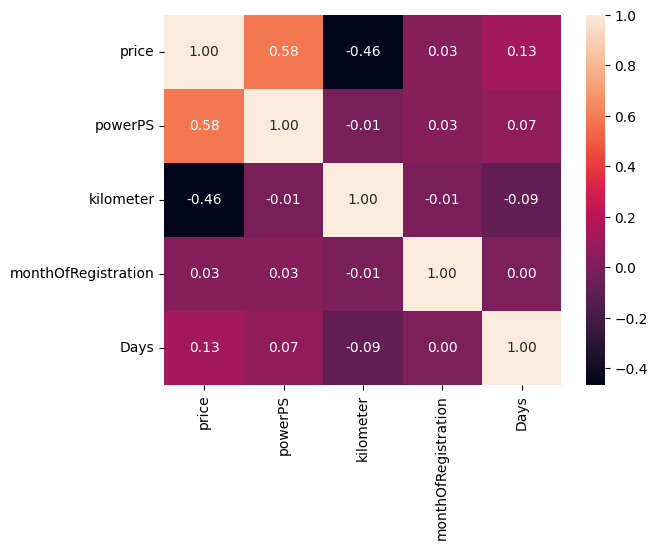

In [ ]:
sns.heatmap(df_c.corr(), annot=True, fmt='.2f')

In [ ]:
df_c.to_csv('df.csv')

In [ ]:
df_c2 = df_c.copy()

In [ ]:
df_c2.drop('lastSeen',axis=1,inplace=True)

In [ ]:
df_c2.reset_index(drop=True,inplace=True)

In [ ]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278819 entries, 0 to 278818
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 278819 non-null  object
 1   price                278819 non-null  int64 
 2   vehicleType          278819 non-null  object
 3   yearOfRegistration   278819 non-null  object
 4   gearbox              278819 non-null  object
 5   powerPS              278819 non-null  int64 
 6   model                278819 non-null  object
 7   kilometer            278819 non-null  int64 
 8   monthOfRegistration  278819 non-null  int64 
 9   fuelType             278819 non-null  object
 10  brand                278819 non-null  object
 11  notRepairedDamage    278819 non-null  object
 12  dateCreated          278819 non-null  object
 13  Days                 278819 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 29.8+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score
from category_encoders import OneHotEncoder
from sklearn.datasets import make_classification

In [ ]:
x = df_c2.drop('price', axis=1)
y = df_c2['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(f'학습용 : {x_train.shape, y_train.shape}')
print(f'평가용 : {x_test.shape, y_test.shape}')
print(f'검증용 : {x_val.shape, y_val.shape}')

학습용 : ((178444, 13), (178444,))
평가용 : ((55764, 13), (55764,))
검증용 : ((44611, 13), (44611,))


In [ ]:
from sklearn.metrics import accuracy_score

base_major = y_train.mode()[0]
y_pred_base = [base_major] * len(y_train)

accuracy_score(y_train, y_pred_base)

0.01386989755889803

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
!pip install category_encoders
!pip install xgboost==1.7.2
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from category_encoders import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
x_train_encoded = x_train.copy()
x_val_encoded = x_val.copy()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)

In [ ]:
rf_model = RandomForestRegressor(random_state=2)

In [ ]:
rf_model.fit(x_train_encoded, y_train)

rf_preds = rf_model.predict(x_val_encoded)

rf_mae = (abs(rf_preds - y_val)).mean()

print("랜덤포레스트모델의 mae:", rf_mae)

랜덤포레스트모델의 mae: 5152.38123563586


In [ ]:
rf_pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(random_state=2)
)

In [ ]:
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'vehicleType', 'gearbox', 'model',
                                      'fuelType', 'brand', 'notRepairedDamage',
                                      'dateCreated'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': Merzedes_Benz_C200_T_W203_C_Klasse                                       1
Hyundai_i20_1.4_CRDi_Comfort_Sondermodel                                 2
FORD_FOCUS_Turnier_1.6___*1.HAND*___Kupplung_&_Zahnriemen_NEU!!!         3
BMW_Z...
nein       2
ja         3
NaN       -2
dtype: int64},
                                         {'col': 'dateCreated',
                                          'data_type': dtype('O'),
                                          'mapping': 2016-03-20 00:00:00     1
2016-03-25 00:00:00     2
2016-04-03 00:00:00     3
2016-03-24 00:00:00     4
2016-03-12 00:00:00     5
                       ..
2016-01-27 00:00:00    89
2015-12-06 00:00:00    90
2016-01-29 00:00:00    91
2016-02-04 00:00:00    92
NaN                    -2
Length: 93, dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=2))])

In [ ]:
from xgboost import XGBRegressor
from category_encoders import OrdinalEncoder


xgb_pipeline = make_pipeline(
    OrdinalEncoder(),
    XGBRegressor(random_state=2)
)

In [ ]:
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'vehicleType',
                                      'yearOfRegistration', 'gearbox', 'model',
                                      'fuelType', 'brand', 'notRepairedDamage',
                                      'dateCreated'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': Merzedes_Benz_C200_T_W203_C_Klasse                                       1
Hyundai_i20_1.4_CRDi_Comfort_Sondermodel                                 2
FORD_FOCUS_Turnier_1.6___*1.HAND*___Kupplung_&_Za...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=2, ...))])

In [ ]:
print("과적합 해소 훈련 정확도: ", xgb_pipeline.score(x_train, y_train))
print("과적합 해소 검증 정확도: ", xgb_pipeline.score(x_val, y_val))

과적합 해소 훈련 정확도:  0.9311438243350898
과적합 해소 검증 정확도:  -0.2630430626364264


In [ ]:
xgb_preds = xgb_pipeline.predict(x_val)

In [ ]:
xgb_mae = (abs(xgb_preds - y_val)).mean()

In [ ]:
print("xgb부스터모델(pipe)의 mae:", xgb_mae)

xgb부스터모델(pipe)의 mae: 5164.070127047283


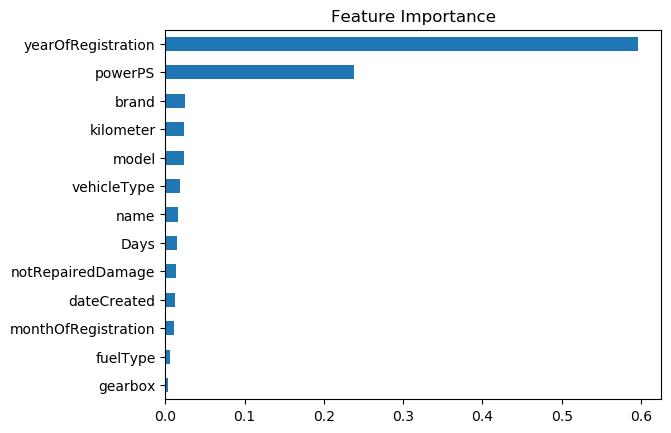

Text(0.5, 1.0, 'Cardinality')

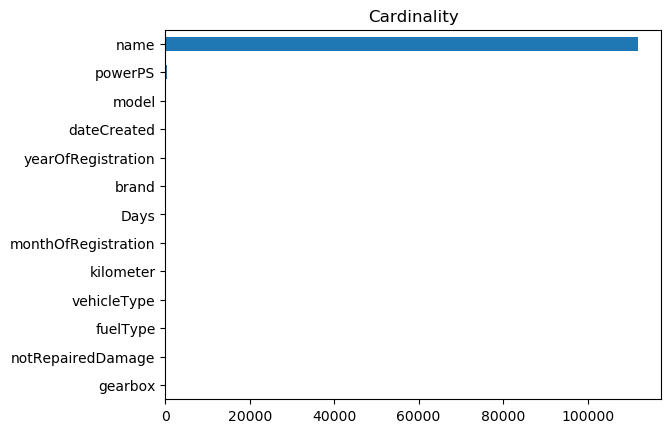

In [ ]:
rf = rf_pipeline.named_steps["randomforestregressor"]
importances = pd.Series(rf.feature_importances_, x_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

x_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")

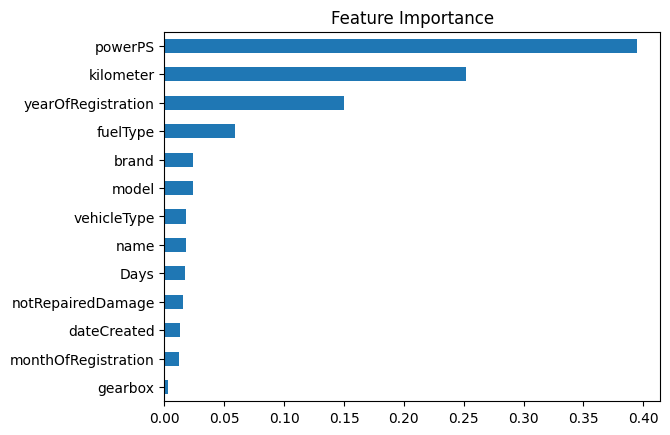

Text(0.5, 1.0, 'Cardinality')

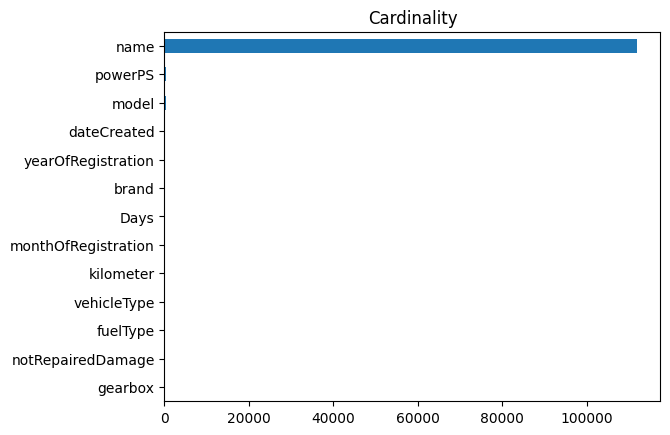

In [ ]:
xgb = xgb_pipeline.named_steps["xgbregressor"]
importances = pd.Series(rf.feature_importances_, x_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

x_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")

In [ ]:
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    rf_pipeline.named_steps['randomforestregressor'],
    scoring='neg_mean_absolute_error',
    n_iter=10,
    random_state=2
)
x_test_preprocessed = rf_pipeline[0].transform(x_test)
permuter.fit(x_test_preprocessed, y_test)

PermutationImportance(estimator=RandomForestRegressor(random_state=2),
                      n_iter=10, random_state=2,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance')

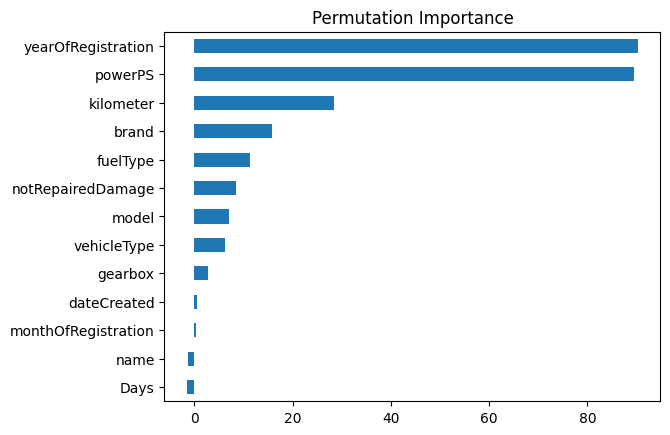

In [ ]:
feature_names = x_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
permuter2 = PermutationImportance(
    xgb_pipeline.named_steps['xgbregressor'],
    scoring='neg_mean_absolute_error',
    n_iter=10,
    random_state=2
)
x_test_preprocessed2 = rf_pipeline[0].transform(x_test)
permuter2.fit(x_test_preprocessed2, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.300000012,
                                             max_bin=256, max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=6,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=2, ...),
                      n_iter=10, random_state=2,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance')

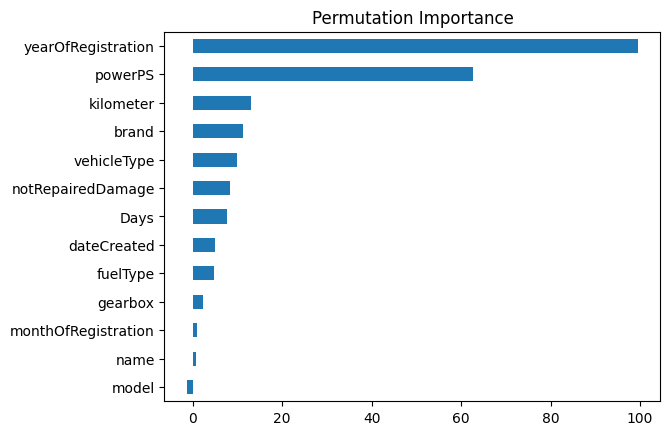

In [ ]:
feature_names = x_test.columns.tolist()
pi = pd.Series(permuter2.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
df_c3 = df_c.copy()

In [ ]:
df_c3.drop('lastSeen',axis=1,inplace=True)

In [ ]:
df_c3.reset_index(drop=True,inplace=True)

In [ ]:
x = df_c3.drop('price', axis=1)
y = df_c3['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(f'학습용 : {x_train.shape, y_train.shape}')
print(f'평가용 : {x_test.shape, y_test.shape}')
print(f'검증용 : {x_val.shape, y_val.shape}')

학습용 : ((178444, 13), (178444,))
평가용 : ((55764, 13), (55764,))
검증용 : ((44611, 13), (44611,))


In [ ]:
from sklearn.metrics import accuracy_score

base_major = y_train.mode()[0]
y_pred_base = [base_major] * len(y_train)

accuracy_score(y_train, y_pred_base)

0.01386989755889803

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer


pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth=8),
)
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'vehicleType',
                                      'yearOfRegistration', 'gearbox', 'model',
                                      'fuelType', 'brand', 'notRepairedDamage',
                                      'dateCreated'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': Merzedes_Benz_C200_T_W203_C_Klasse                                       1
Hyundai_i20_1.4_CRDi_Comfort_Sondermodel                                 2
FORD_FOCUS_Turnier_1.6___*1.HAND*___Kupplung_&_Za...
                                          'data_type': dtype('O'),
                                          'mapping': 2016-03-20 00:00:00     1
2016-03-25 00:00:00     2
2016-04-03 00:00:00     3
2016-03-24 00:00:00     4
2016-03-12 00:00:00     5
                       ..
2016-01-27 00:00:00    89
2015-12-06 00:00:00    90
2016-01-29 00:00:00    91
2016-02-04 00:00:00    92
NaN                    -2
Length: 93, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [ ]:
print("결정트리 훈련 정확도: ", pipe_dt.score(x_train, y_train))
print("결정트리 검증 정확도: ", pipe_dt.score(x_val, y_val))

결정트리 훈련 정확도:  0.03376409405751945
결정트리 검증 정확도:  0.029095962879110534


In [ ]:
from sklearn.metrics import classification_report
y_pred = pipe_dt.predict(x_val)
print(classification_report(y_val, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier( random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf2.fit(x_train, y_train)

print("과적합 해소 훈련 정확도: ", pipe_rf2.score(x_train, y_train))
print("과적합 해소 검증 정확도: ", pipe_rf2.score(x_val, y_val))